<a href="https://colab.research.google.com/github/barrytl/CE6003/blob/master/Example_3_1_viola_jones.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

# Viola Jones Algorithm
In this example we will investigate using a pre-trained cascade of classifiers from the OpenCV Library to perform face detection.  

![Cascade of Classifiers](https://github.com/tonyscan6003/CE6003/blob/master/images/viola_jone_cascade.jpg?raw=true)

The notebook is setup with a simple face detection. You can see a full range of possible cascades that can detect other objects [here](https://github.com/opencv/opencv/tree/master/data/haarcascades) 

As an exercise:
 1. Try some other images of people by changing the image url link and see how the cascade of classifiers performs at face detection
 2. Try changing the scale and minNeighbors parameters and observe the effect on face detection. 
 3. Try changing the to use some of the other cascades (such as the cat face detectector) and see how they perform with appropiate images.

##**HouseKeeping**:
 Import Packages, define image read function, install OpenCV pre-trained cascade classifiers 

In [1]:
# Import libraries
import numpy as np
import urllib.request
import cv2
import numpy as np
from matplotlib import pyplot as plt

# Function to read images from the Web.
def url_to_image(url):
	resp = urllib.request.urlopen(url)
	temp_image = np.asarray(bytearray(resp.read()), dtype="uint8")
	temp_image = cv2.imdecode(temp_image, cv2.IMREAD_COLOR)
	temp_image = cv2.cvtColor(temp_image, cv2.COLOR_BGR2RGB) # OpenCV defaults to BGR, but we need RGB here..
	return temp_image

We also need to load some additional data from OpenCV that contains the cascade classifiers that we are going to use.

In [2]:
!apt install opencv-data

Reading package lists... Done
Building dependency tree       
Reading state information... Done
The following NEW packages will be installed:
  opencv-data
0 upgraded, 1 newly installed, 0 to remove and 37 not upgraded.
Need to get 1,196 kB of archives.
After this operation, 10.1 MB of additional disk space will be used.
Get:1 http://archive.ubuntu.com/ubuntu bionic-updates/universe amd64 opencv-data all 3.2.0+dfsg-4ubuntu0.1 [1,196 kB]
Fetched 1,196 kB in 1s (978 kB/s)
Selecting previously unselected package opencv-data.
(Reading database ... 155219 files and directories currently installed.)
Preparing to unpack .../opencv-data_3.2.0+dfsg-4ubuntu0.1_all.deb ...
Unpacking opencv-data (3.2.0+dfsg-4ubuntu0.1) ...
Setting up opencv-data (3.2.0+dfsg-4ubuntu0.1) ...


##**Load and display Test Images**:
We can load different images to test by changing the URL in the cell below.

In [3]:
# Read Test Image URL with People faces or Cat faces!
img_url = "https://upload.wikimedia.org/wikipedia/commons/thumb/9/98/Friends_become_family.jpg/1024px-Friends_become_family.jpg"
img = url_to_image(img_url)

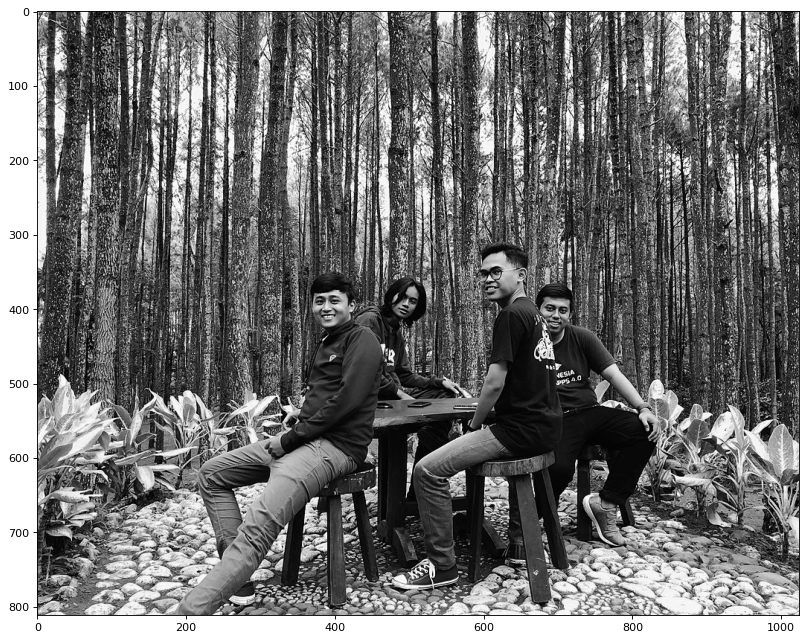

In [4]:
gray = cv2.cvtColor(img, cv2.COLOR_BGR2GRAY)
plt.figure(figsize=(14, 10), dpi=80)
plt.imshow(gray,'gray')
plt.show()

##**Define pre-trained classifier**:
In the cell below we can set the paths to the data for different cascades and define each cascade classifier using the cv2.CascadeClassifier() command.

In [5]:


from os.path import realpath, normpath

face_cascade_xml_path = "/usr/share/opencv/haarcascades/haarcascade_frontalface_default.xml"
#cat_face_cascade_path = "/usr/share/opencv/haarcascades/haarcascade_frontalcatface.xml"

# Setup your cascade with one of the paths above
my_cascade = cv2.CascadeClassifier(face_cascade_xml_path)



##**Run the face detector**: 
We do this by using the .detectMultiScale method with the classifier we have setup. Note the scale factor `scale` that sets up the scaling in the image pyramid for th detector. Setting this close to 1 increases the number of scaled images that will be tested. The `minNeighbors` parameter helps to reduce the number of false positive detections see explaination here: https://stackoverflow.com/questions/22249579/opencv-detectmultiscale-minneighbors-parameter

You can change the value of scale and minNeighbors and observe the effect on detections yourself.


In [6]:
# Now lets run the face detector cascade against this grayscale image
scale = 1.03
minNeighbors = 6 
foundObject = my_cascade.detectMultiScale(gray, scale, minNeighbors)

##**Plot image with the bounding boxes**: 
Bounding boxes for for face or other object detections in the original Image.

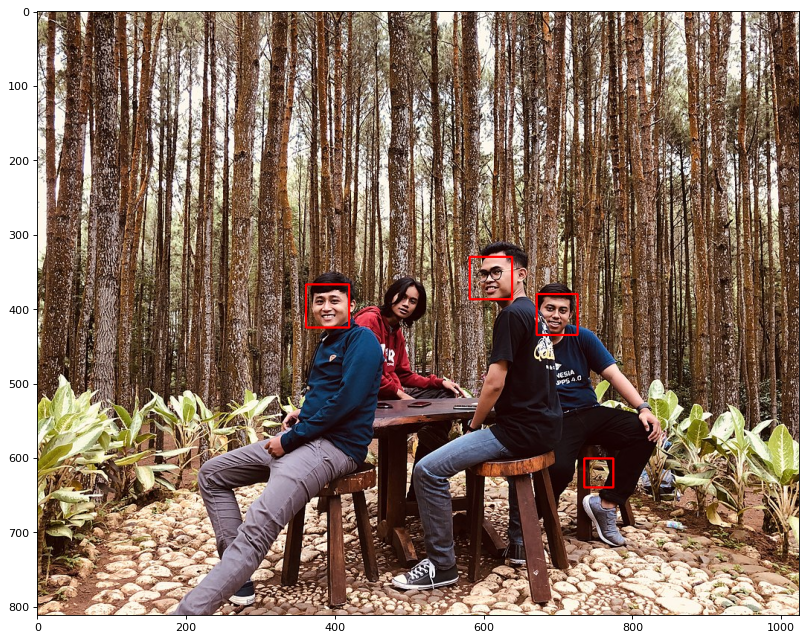

In [7]:
# setup colors and line thickness for drawing bounding boxes
greenColor = (0, 255, 0)
redColor = (255, 0, 0)
lineThickness = 2

detectionsImg = img
# now process each face/object found, 
for (fx, fy, fw, fh) in foundObject:
    # draw the bounding box for each face
    cv2.rectangle(detectionsImg, (fx, fy), (fx + fw, fy + fh), redColor, lineThickness)

plt.figure(figsize=(14, 10), dpi=80)
plt.imshow(img)
plt.show()